In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
Dtrain = pd.read_csv("CWRU Dataset-1-train.csv")
#Dtrain = Dtrain.iloc[:,0:4].values
Dtest = pd.read_csv("CWRU Dataset-1-test.csv")

In [3]:
Dtrain["Bearing"].value_counts()

Normal                 96896
Outer Race (0.007")    96896
Inner Race (0.007")    96896
Name: Bearing, dtype: int64

In [4]:
Dtrain["Bearing"].value_counts(normalize=True)*100

Normal                 33.333333
Outer Race (0.007")    33.333333
Inner Race (0.007")    33.333333
Name: Bearing, dtype: float64

In [5]:
Dtest.columns

Index(['Bearing', 'Fault Diameter', 'DE', 'FE'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtrain["Bearing"] = labelencoder_train.fit_transform(Dtrain["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtrain = ct.fit_transform(Dtrain)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtest["Bearing"] = labelencoder_train.fit_transform(Dtest["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtest = ct.fit_transform(Dtest)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(Dtrain))
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(Dtest))



In [9]:
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [10]:
import tensorflow as tf
from numpy.random import seed
seed(10)
tf.random.set_seed(10)
act_func = 'elu'

In [11]:
# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(6,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(3,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(6,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'] )

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=100

In [12]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 276153 samples, validate on 14535 samples
Epoch 1/100
276153/276153 [==============================] - 12s 43us/step - loss: 0.0185 - accuracy: 0.6059 - val_loss: 0.0033 - val_accuracy: 0.4288
Epoch 2/100
276153/276153 [==============================] - 10s 37us/step - loss: 0.0017 - accuracy: 0.6816 - val_loss: 0.0020 - val_accuracy: 0.5404
Epoch 3/100
276153/276153 [==============================] - 10s 37us/step - loss: 6.5788e-04 - accuracy: 0.6773 - val_loss: 6.0821e-04 - val_accuracy: 0.4430
Epoch 4/100
276153/276153 [==============================] - 10s 36us/step - loss: 1.5762e-04 - accuracy: 0.6778 - val_loss: 7.0002e-05 - val_accuracy: 0.6405
Epoch 5/100
276153/276153 [==============================] - 10s 36us/step - loss: 6.0463e-05 - accuracy: 0.6747 - val_loss: 3.3925e-05 - val_accuracy: 0.5617
Epoch 6/100
276153/276153 [==============================] - 10s 36us/step - loss: 3.9366e-05 - accuracy: 0.6699 - val_loss: 2.6391e-05 - val_accuracy: 0.6398
Epoch 7/100

Epoch 52/100
276153/276153 [==============================] - 10s 36us/step - loss: 1.4915e-06 - accuracy: 0.6374 - val_loss: 1.0042e-06 - val_accuracy: 0.5408
Epoch 53/100
276153/276153 [==============================] - 10s 36us/step - loss: 1.6252e-06 - accuracy: 0.6403 - val_loss: 1.0921e-06 - val_accuracy: 0.5003
Epoch 54/100
276153/276153 [==============================] - 10s 36us/step - loss: 1.6319e-06 - accuracy: 0.6371 - val_loss: 1.0378e-06 - val_accuracy: 0.3108
Epoch 55/100
276153/276153 [==============================] - 10s 36us/step - loss: 1.6288e-06 - accuracy: 0.6375 - val_loss: 2.5292e-05 - val_accuracy: 0.3261
Epoch 56/100
276153/276153 [==============================] - 11s 41us/step - loss: 1.6247e-06 - accuracy: 0.6403 - val_loss: 1.0783e-06 - val_accuracy: 0.9594
Epoch 57/100
276153/276153 [==============================] - 10s 38us/step - loss: 1.5834e-06 - accuracy: 0.6392 - val_loss: 1.5791e-06 - val_accuracy: 0.3984
Epoch 58/100
276153/276153 [============

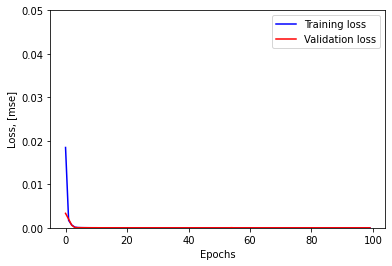

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.05])
plt.show()

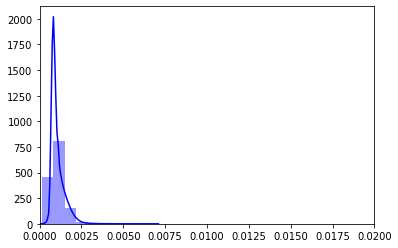

In [14]:
X_pred = model.predict(np.array(X_train))

import seaborn as sns

scored = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored, bins = 10, kde= True, color = 'blue');
plt.xlim([0.0,.02])
plt.show()

In [15]:
X_pred = model.predict(np.array(X_test))

scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.0025
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.sample(100)

,Loss_mae,Threshold,Anomaly
69919,0.000747,0.0025,False
32811,0.000836,0.0025,False
18961,0.001642,0.0025,False
30513,0.000872,0.0025,False
65853,0.000795,0.0025,False
...,...,...,...
14862,0.000273,0.0025,False
72657,0.002576,0.0025,True
40723,0.001069,0.0025,False
2675,0.001112,0.0025,False


In [16]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train)

scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.0025
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

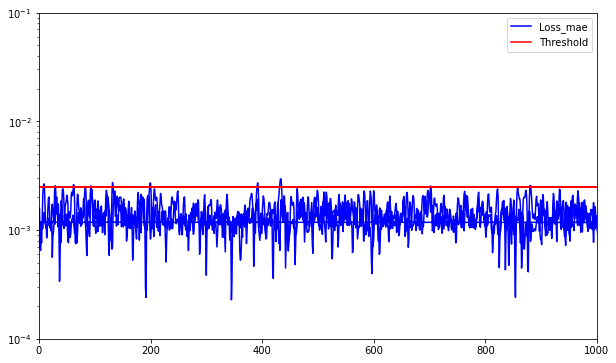

In [17]:
scored.plot(logy=True,  figsize = (10,6), xlim =[0,1000], ylim = [1e-4,1e-1], color = ['blue','red'])

In [18]:
scored_train['Loss_mae'].mean()

0.00105949213999237

In [19]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.001555,0.0025,False
1,0.001601,0.0025,False
2,0.000842,0.0025,False
3,0.000753,0.0025,False
4,0.001139,0.0025,False
...,...,...,...
290683,0.000764,0.0025,False
290684,0.000746,0.0025,False
290685,0.000752,0.0025,False
290686,0.000822,0.0025,False


In [20]:
scored_train[scored_train['Anomaly'] == True]

,Loss_mae,Threshold,Anomaly
29,0.002558,0.0025,True
132,0.002732,0.0025,True
702,0.002544,0.0025,True
1359,0.002679,0.0025,True
1360,0.002703,0.0025,True
...,...,...,...
290524,0.002855,0.0025,True
290535,0.003151,0.0025,True
290615,0.003205,0.0025,True
290620,0.003052,0.0025,True
